# check posteriors and identify problematic runs
This notebook checks over all the posteriors to evaluate goodness-of-fit and problematic runs after `provabgs` is run on the SVDA data. 

In [1]:
import os
import h5py 
import glob
import numpy as np

In [2]:
from provabgs import util as UT
from provabgs import infer as Infer
from provabgs import models as Models
from provabgs import flux_calib as FluxCalib

In [3]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False


Bad key text.latex.preview in file /global/homes/c/chahah/.conda/envs/gqp/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /global/homes/c/chahah/.conda/envs/gqp/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /global/homes/c/chahah/.conda/envs/gqp/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95 

In [4]:
dir_dat = '/global/cfs/cdirs/desi/users/chahah/provabgs/svda/'

In [5]:
w_lines = np.array([
        1033.3  , 1215.67 , 1239.42 , 1305.53 , 1335.52 , 1399.8  ,
        1545.86 , 1640.4  , 1665.85 , 1857.4  , 1908.27 , 2326.   ,
        2439.5  , 2800.32 , 3346.79 , 3426.85 , 3728.3  , 3798.976,
        3836.47 , 3889.   , 3934.777, 3969.588, 4072.3  , 4102.89 ,
        4305.61 , 4341.68 , 4364.436, 4862.68 , 4960.295, 5008.24 ,
        5176.7  , 5895.6  , 6302.046, 6365.536, 6549.86 , 6564.61 ,
        6585.27 , 6707.89 , 6718.29 , 6732.67 ])

In [6]:
hpixs = np.array([int(f.split('-')[-1].split('.')[0]) for f in glob.glob(os.path.join(dir_dat, 'provabgs-sv3-bright-*.BGS_BRIGHT.hdf5'))])
print('%i healpixels' % len(hpixs))

369 healpixels


11.56251163280159 11.692548559709305 12.496619242829691
11.561807324512873 12.096735382349003 12.49110225786224
12.056499626652714 12.226195598496318 12.491362703953634
11.238520638593325 11.747839712347421 12.444690063554086
11.375743978450902 12.089577398230729 12.487220090259667
12.12308032462671 12.272315773160635 12.49286841352876
11.578415809619994 12.457737859837104 12.499447790838879
11.60272990160631 12.16567857923973 12.490110468690268
11.804884720271458 12.151340495739504 12.48405940542171
11.57435087809495 12.265751252108512 12.497784932887797
11.437625862424161 11.757813842874363 12.48655550980671
11.940896865439647 12.204973164113486 12.489947763756295
11.472122425839817 12.133049625948395 12.492150206912843
11.785481752389803 11.941573020813188 12.447914641303754
5.852401855536174 0.27527452
11.830300355707223 12.101820416128684 12.472683326642121
12.000217129216933 12.203962054033585 12.440104233344709
12.139252495036684 12.342697795425607 12.495216144766506
11.15979139

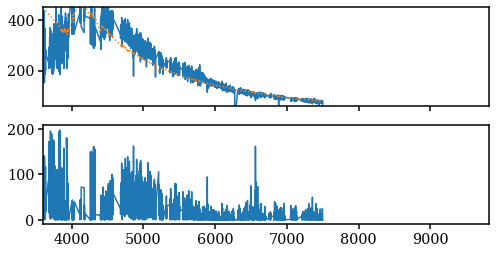

11.545764870808318 12.1797495244141 12.492987776809473
11.2584839894624 11.450835590999072 12.425873012252659
11.48736273920383 11.973440463830112 12.485747709847038
11.661354470971679 11.71132876938708 12.49486360944955
11.46904988515202 12.148232109805534 12.478918943393284
11.982848866424229 12.049453405409919 12.497796934245372
11.867588632495755 12.448565299591543 12.499374913782608
10.960327872021743 12.055888680022186 12.498676813313477
7.000014903727505 7.0022532120016345 7.0809845169955965
7.042291198943346 7.623953284877686 7.782682919504323
11.37846948470683 12.13105549573283 12.494245446284815
5.282648085994438 0.59617627
12.111007156200259 12.219800959829893 12.493531077272733
11.462822685246536 12.315207083567032 12.495276617658178
11.905102525789397 12.286576534144487 12.488731678547898
11.632113674397559 11.95615648949176 12.429159193891415
11.72802855446561 12.08200090238095 12.42853494120002
11.738303711620034 12.15482576052367 12.484691592649336
11.823461803430096 12

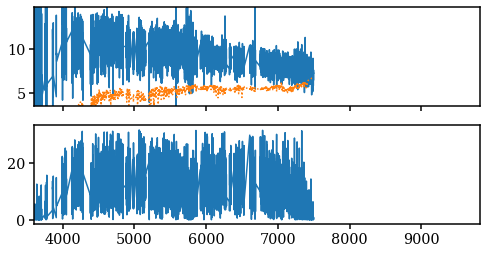

7.000000039654335 7.000006348437305 7.066568192070317
12.045363704575879 12.321339400717932 12.494909188087144
11.477504038169373 12.311672557857502 12.496325898009497
11.669807031119918 12.087545773634677 12.462937434166044
10.905211944867718 12.129247800064856 12.491789044172766
12.127162681012948 12.385107656582928 12.495076284822176
11.767318315033704 12.163597355427552 12.480560562455448
11.728170512345775 12.053259728473995 12.410430843898592
11.450800091827485 11.836856450070066 12.430149997399356
11.652145120162375 11.95910342127376 12.42264759886173
11.408269267083508 12.399067789111275 12.499441251016673
11.986284447698768 12.41972038779468 12.49855157134753
10.96239580700839 12.346170313520748 12.47800750798984
11.545259547416117 12.067806870639046 12.494732057462123
11.706065479949835 12.247372946661379 12.498160391542767
11.672486639576418 12.240712851909684 12.494985549217114
11.422993146194358 12.0289711206276 12.492345997437244
11.942148541560359 12.294106409515738 12.4

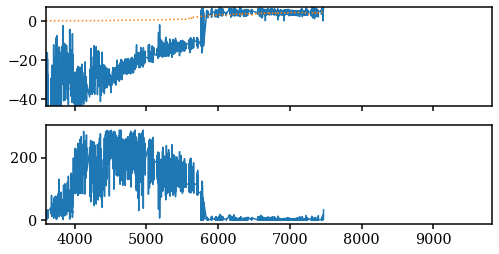

6.001017800568985 0.6100023
11.7246018170446 12.12441600734103 12.484246199908819
12.067972204418224 12.228942953249422 12.46975570189718
11.095796539920391 12.323031623097997 12.492274942173015
12.205769567728774 12.485997694301783 12.49978909610595
11.420191239145474 11.971871847899905 12.423651776477241
11.62240138804395 12.095038210085807 12.487772259303686
11.297584679183316 11.619003647995225 12.401445990735134
11.221198673397986 12.15124985374332 12.486956951154841
11.755258314349147 12.156609302449201 12.490482994458535
84.67771799042778 1.2278438
12.053010201459001 12.475821176212225 12.499930089620014
11.675738867526123 12.039890869880207 12.49141965706272
12.107188008566375 12.382530045988501 12.497717569715924
9.078736220425482 0.20472634
11.729507155967719 12.239770367345141 12.491840596525199
7.0001780131797 7.1182450633971674 7.34192221572647
11.553218470359319 11.83684357786423 12.446701342921218
11.721497014193293 11.937177399524458 12.479496895071758
11.58535647346514

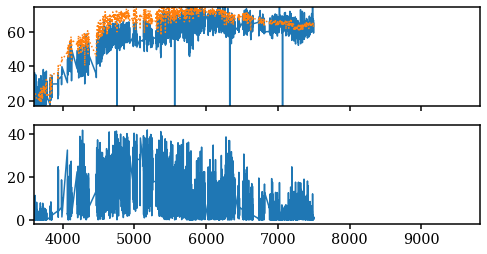

11.977933952743152 12.136416906489796 12.451091269083772
11.966898786967276 12.084052092542382 12.432039100443983
8.723681762951024 0.17777163
25.125342212920078 0.45343146
12.958515439390665 0.36742556
14.69699894969544 0.09525228
11.371925242409393 12.179962681489908 12.491711520934809
11.600113320174888 11.965383409879772 12.488162615353216
11.411447522595047 12.1201796218173 12.489929466744737
11.614809733387801 11.996158157298328 12.41716251304167
7.150147110326309 0.135698
11.441259066757954 12.14052546859805 12.482059052523633
9.450775251947883 0.14302354
11.671699630723204 12.028875900142953 12.405657821943294
11.833420204544831 12.11000514781734 12.471930115236555
12.021515207966562 12.119711882316086 12.488887757487197
11.291936341250345 12.166063555264236 12.485354071533129
11.371619785398993 12.06585338272292 12.472401754280341
11.562020417248345 12.293267835802958 12.496884118049623
12.305867303863062 12.454212103590269 12.499318942458848
11.76806932485396 12.1958630358623

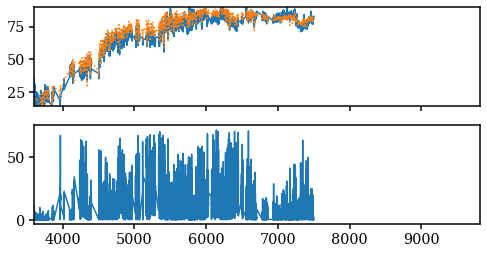

12.018575193505136 12.407553640733607 12.498430779685485
11.703304214991817 12.373876146919025 12.497743044851568
12.124779321175513 12.467869111928666 12.499560898118343
11.066229889592481 12.097872606667588 12.49970270058909
11.328539053007146 12.297209142184606 12.49686746589498
7.09938470276178 7.175287026095253 7.3219296669806795
11.53651482875146 12.359024416650069 12.440579943170116
11.176162903473639 11.663645233290023 12.452913135348147
7.0051235372291565 7.137972476176702 7.35271919413597
11.140049322636921 11.770772739735914 12.404140708258671
11.655856902073456 11.828713488120878 12.441345925037067
11.936499145246696 12.33757090771363 12.497533139481321
11.572209781885341 12.322244670541085 12.497075943592671
11.829910311338342 12.44186506299545 12.49926937217314
11.849841720617711 12.19179067272771 12.49169351523426
11.717503064953043 12.134688043198953 12.457883980455437
11.342473368090264 12.069555757783128 12.427137708067157
11.514996297038389 12.194975441209696 12.4942

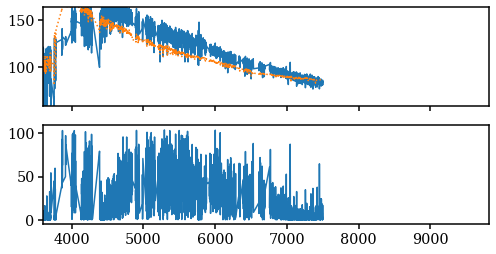

7.000000068219338 7.000017197888079 7.118952709448807
12.12117580274983 12.32895851986233 12.497406480789738
11.492808659717317 11.639933684716912 12.497920268318886
11.589305233208158 11.807635909847011 12.465988807355311
11.876362027223141 12.275014552988651 12.49585089560656
12.056584450601083 12.297914711521004 12.494240879010649
12.241568688416207 12.355515251630658 12.465349938123449
11.639283535264408 12.203670103225662 12.49627076798
11.70115392788886 12.092416126953502 12.40599941941762
11.653187719469765 11.938592550745554 12.468226540188368
11.29313055544503 12.239917168096403 12.493734914906764
11.241427227028328 11.921517052363072 12.419429891674644
11.180747165122312 11.567123395614654 12.498966974148152
11.662787530593485 11.866033614672483 12.452145638349293
11.621591836366742 11.761220597631421 12.437376194638667
12.059565177197356 12.274560813296553 12.497447189201463
11.227271241814536 12.448677911025815 12.49975925620584
11.953486344680154 12.183126984935306 12.4829

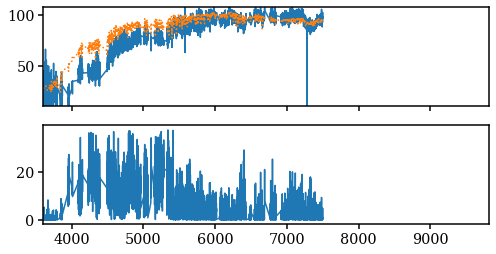

11.701802315143299 11.975413919088549 12.41524135532536
7.471767581499576 0.709909
11.652024701517568 11.91974538852314 12.480554995256707
11.19861187732677 12.04724845602279 12.440682107141635
11.248108070857263 12.013247966630221 12.468432924491431
11.679709407825737 12.06446329771667 12.475204768561989
5.751684000281271 0.18876447
11.660566522493358 12.114143728314662 12.488355494891355
12.041842363727477 12.20733051456279 12.490383811136404
11.469701083479565 12.049622359594352 12.40216770154416
11.412791404728855 12.037522574812012 12.485224055833736
10.439754703235803 0.6274189
11.479137128475775 11.919995639930427 12.474921793903336
11.499157337449851 12.417767269959523 12.4989116241234
11.94421163149699 12.259525065003036 12.494584075424362
7.063482994478118 7.1003583278653615 7.612110565589215
11.640863268683653 11.989032149688644 12.432732954365713
105.27421777767161 0.57619536
7.000000000405782 7.000000041475479 7.058682942411013
11.4703294478839 12.070372880126907 12.448173

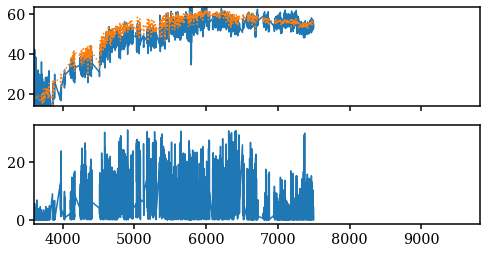

7.7397139843923375 0.09440738
11.795230697262797 11.842549643308173 12.49696650628193
12.009728047280054 12.199531029922234 12.43626549794905
11.547631050815554 11.887942893211095 12.453784564653766
11.048542286975099 11.994778644066578 12.490590053997588
12.343411677895599 12.456773051457494 12.499578642927162
11.896369753090001 11.941197372753795 12.413254572134107
11.202797870013871 11.779438771308499 12.4484817574712
11.972783260115566 12.362297855810944 12.497504859789693
7.086308607884106 0.47893938
7.000222659709217 7.241767479589397 7.636433106497765
11.807283838481176 12.306779710892805 12.49689947728348
12.02723512541949 12.285463956055867 12.489605694260158
11.730297757496675 12.083988068393676 12.46171355511407
11.372341036162393 11.757368221466672 12.494659672551407
11.866585541664229 12.067519464287324 12.422547977256212
11.199479453213273 11.806841412911766 12.490283362588146
11.576971224221785 11.854400761079397 12.46958476750453
12.039713462252449 12.392438620008011 12

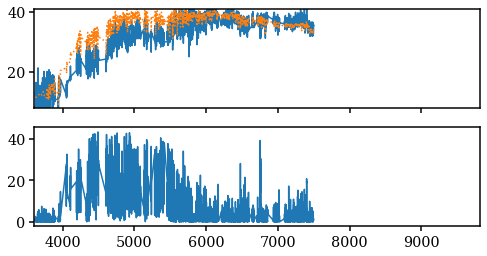

11.901350367078729 12.06196625491672 12.452371085004568
11.774621519593481 12.010735467252523 12.48908616114776
11.180370013638491 11.564675761504505 12.499821142994037
11.729335779219717 12.041410541879728 12.463767678358606
11.682615787968706 12.05427566363198 12.48195295134577
11.892335851388458 12.17771452832962 12.488767235012611
12.238525807700253 12.477976540609744 12.499762373484382
11.532252825206776 12.063665605151925 12.491298254946173
11.647973515550408 12.044563918225855 12.470513328731615
11.43896040129046 11.984514022554672 12.496676896288728
11.973854078019388 12.371088933847268 12.493913686550519
11.726342973160671 12.195683179531766 12.486689473052065
11.541399685764542 11.872517672012183 12.483711147741014
11.54549093811896 12.008370466361109 12.423941374938119
11.541780297179843 12.2589878230158 12.495432323105211
11.854767535292345 12.198874395025616 12.486004740081322
11.607277676434267 11.891395022153034 12.470248311388632
7.003070086241446 7.076584501626305 7.26

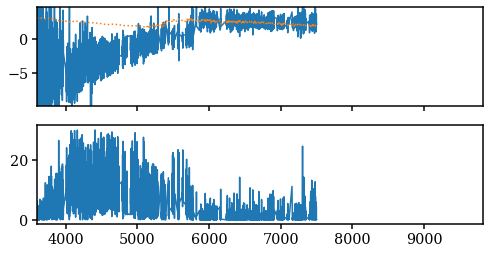

11.757956600758005 12.099109437017775 12.437736840538381
11.876242308992529 12.174572197968399 12.484172138397643
11.413826359758636 11.835622964177247 12.466775387353296
432.1720371517377 0.06942124
7.000000000008529 7.000000000636791 7.15802768942697
12.206376172615084 12.44031375161477 12.499327536334391
11.49059092918323 12.115086220195352 12.481737395379124
11.300706928873643 12.149487639930307 12.491324845318829
5.982586624214654 0.18161699
11.789000472808764 12.265477974092542 12.49553907916413
11.53359760946749 12.161756217104047 12.48796751547087
11.70868546219268 12.374228173985335 12.497593678647563
11.607296960738925 12.418852025921783 12.498762953025464
11.35037242297378 12.124208874120894 12.4987607975054
11.502138676032573 11.917542854106909 12.453988030617376
11.665850744589392 11.970452189983886 12.493364221226722
11.568637009829875 11.872382133231868 12.470674259536548
11.467450477127622 12.237106463489921 12.494815500001318
12.217368188423627 12.294763059440632 12.49

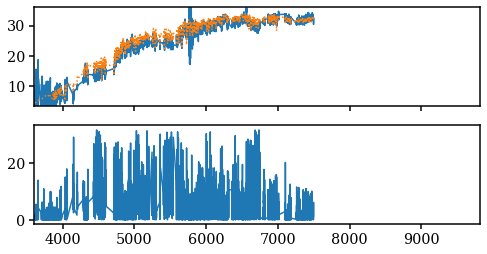

11.934113998381724 12.025264640882705 12.477446463414415
11.41487564875507 11.976616889988849 12.434166493494994
11.417070415646199 12.289504516168433 12.490322221293338
11.444873076540482 11.998780445307892 12.441342353428677
11.326138607001068 12.172209874207226 12.4851326225136
12.043306072210356 12.339689509821895 12.49588807949237
9.899530778771565 2.2500746
7.000000001538341 7.0000002363154925 7.043740061691855
5.698440114995805 0.47322387
11.768349618470898 12.195256509211227 12.486536602207925
10.359201401620938 0.4125775
11.482419159439136 11.736934002360858 12.428581864199336
11.929307967502767 12.286605387953593 12.495839446696994
8.59316299390503 0.19125313
11.384977169325676 12.00340522743517 12.482751996069712
11.973757716016802 12.21554156085566 12.4755518223089
11.58007410969078 12.373070361500439 12.498030613382348
11.871159511409695 12.27661465630692 12.493824393108197
10.922112692961369 12.190244141268487 12.488208988282757
12.18588315310508 12.299625280412444 12.473

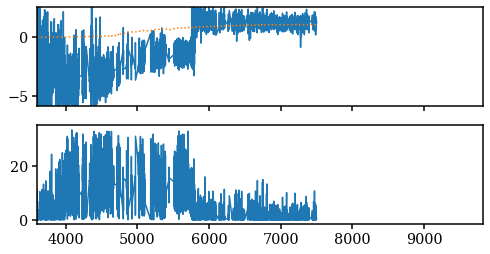

11.438538034078192 12.309368021825843 12.493928401463219
7.0495082886172105 7.140975365325611 7.811969637217624
11.686645587685765 12.019426389630553 12.408320228763198
11.690390414266082 12.05850028947371 12.483593029183778
11.97950147744371 12.240966721753729 12.487777106274276
7.020742573470172 7.098235268947402 7.345523247032585
11.392511743435833 12.008180285066523 12.416458817713002
11.247274890101071 12.117801215369528 12.403190475993195
11.522191527662226 12.247497944323484 12.496191118200457
11.769378643181977 12.40700197435013 12.498852661128263
7.627730289831414 0.47216213
7.1044029823956745 0.3572662
7.082775355970555 0.1502988
11.564503190541885 12.337120663135769 12.497833399280713
6.451892692484441 0.2580726
5.970885807270187 0.7496231
7.688531834498426 0.14478458
11.201447600124075 11.896602833608704 12.440121335673535
5.31167467494416 0.17845052
11.05398635764645 11.7948545555546 12.45027850735545
11.811600398983238 12.181811041133635 12.494109041009626
11.789266744809

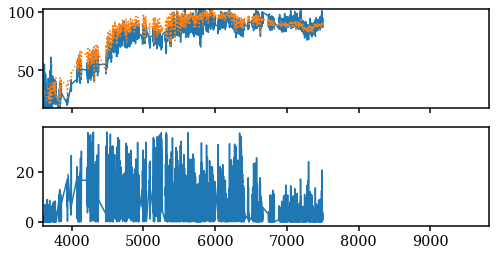

12.047994164804342 12.3042913488986 12.496100643550335
11.582806938725819 12.029224783074612 12.490077019967133
11.981930569058362 12.210934643488837 12.487590868798309
11.724421907909901 12.086061849416442 12.48074819999806
11.832837257832033 12.446466855522887 12.49923057618099
11.847428250858965 12.19697955728994 12.487464514741532
11.99196006180813 12.123035486526817 12.427303307156613
7.001828634511204 7.10799652305376 7.337488969798886
11.694064708150878 12.38193662160224 12.498376927177006
11.345859810048973 12.39413469803834 12.498895158114237
11.605794457659565 12.040016208478285 12.447863444531068
11.902893103344228 12.090246430076952 12.48913507493886
11.61815789475487 11.755926396224531 12.403097997010025
11.934048384825068 12.333834360323415 12.495721556812464
11.273809270429293 12.316203045780611 12.496063379807344
11.409423888277548 12.029093767148783 12.484832303874231
12.04164819993818 12.328169320917484 12.498040769178195
12.311541784754914 12.45526854039553 12.499280

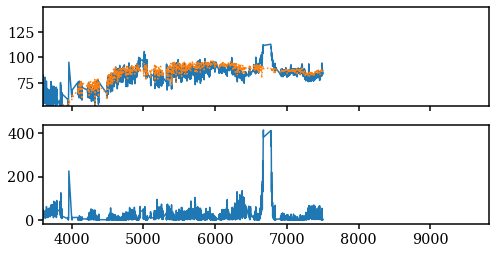

11.631290833485767 12.492018209306838 12.49992587980547
11.490664910153582 12.17631401182663 12.485612257780213
11.995732637941634 12.28591395445059 12.49101296602231
12.072747780570545 12.156704671183375 12.46166130456027
11.125572732820965 11.541662157879015 12.480267334359953
11.704129673646221 11.954365969774793 12.458431657045256
11.51289224488094 11.675333101019985 12.432774531613052
11.3031715915355 11.638004637972754 12.499222755899503
11.19528628636208 12.246963148771188 12.473508453497514
11.43580403536638 11.972096021639883 12.439520364696529
11.840640915601037 12.346912597922167 12.497577477969378
11.385857798216485 11.998538455562029 12.406547496001936
11.692679904219666 12.209745547230561 12.493733805977023
11.790424308366218 12.179944934326581 12.49063921903838
11.643556847862307 12.17270163320284 12.497098777711678
11.951327273977954 12.497791112622956 12.499970033059382
11.557147592995108 12.158256560302567 12.472961473917925
11.947595763332494 12.277898133710845 12.49

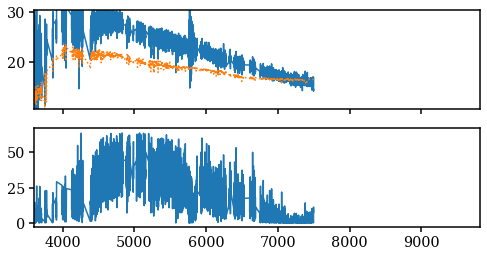

7.000000001460575 7.000000161674332 7.252592812911124
11.674712198509592 12.035528686843108 12.457603888391834
11.121221783460095 11.890591725926527 12.472326056378028
11.486502754916465 11.567616867844995 12.452053742393625
7.000132452893284 7.0099478492420815 7.234357755133147
11.823804888482284 12.049147256458333 12.482247031245707
7.0382322185900605 7.334383598697438 7.7740976253772605
7.000065577673068 7.008119987942847 7.578592928344308
11.536163434319409 12.477283169626265 12.499681520427721
11.450605136520673 12.367803759136361 12.478224323077892
12.002431846501874 12.24655279239844 12.488966005241181
7.000383699719748 7.1034624849745 7.772102634143172
7.000032814638465 7.012763682081812 7.685562465087796
11.959588132448943 12.196647232349616 12.495039974089348
11.916912686608175 12.088925294350139 12.467467266756389
7.00167660238472 7.183859837682934 7.598544411445987
11.476101123416178 11.822164081322974 12.412460786284651
7.000065271688702 7.288258042227142 8.29362119214521


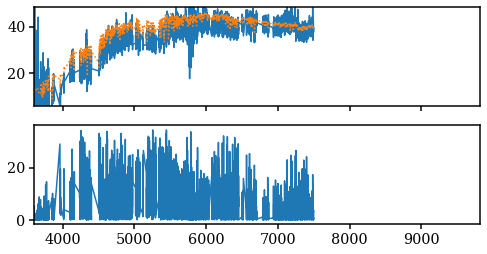

11.789655196565217 11.99145762851223 12.487807957680833
11.553184019183176 12.378513641189695 12.498334448481401
11.573349670890774 12.00465968317212 12.479809707821648
11.616077105632128 11.959888438530749 12.453735196257986
11.817213408390833 12.12239246097911 12.485911506041017
11.818203257439597 12.444766632382478 12.499170676626644
11.308337385902817 12.169188406301036 12.496774201676102
21.24009939003324 3.175339
7.0000000097238875 7.000001513188687 7.043798469988108
11.972114500157028 12.138656782937103 12.420151827429398
11.584262526146407 11.767898324581516 12.499346566606379
11.524548963059749 11.574679427610862 12.406669421002077
11.911231776705531 12.094766246067849 12.420701195521092
11.18514584653249 11.980253036865843 12.47080371956144
11.404792595033948 11.834759212699211 12.4782400652098
11.858137672124222 12.15541429915227 12.47950522116252


In [7]:
flagged_hpix, flagged_targid = [], []
rchi2s = []
for hpix in hpixs:
    try: 
        f = h5py.File(os.path.join(dir_dat, 'provabgs-sv3-bright-%s.BGS_BRIGHT.hdf5' % hpix), 'r')

        targetids = f['targetid'][...].astype(int)
        redshift  = f['redshift'][...]
        w_obs     = f['wavelength_obs'][...]
        spec_obs  = f['flux_spec_obs'][...]
        spec_mod  = f['flux_spec_model'][...]
        ivar_obs  = f['ivar_spec_obs'][...]
        
        mcmc = f['samples'][:,:,:,0]
    except: 
        print()
        print('%i is problematic' % hpix)
        print()
        continue
        
    for igal in range(spec_obs.shape[0]): 
        flagged = False
        ##################################################################
        # check goodness of fit
        ##################################################################
        # calculate chi2 to flag based on goodness of fit        
        w_lines_z = w_lines * (1 + redshift[igal])
        
        # get mask 
        mask = np.zeros(w_obs.shape[1]).astype(bool)
        # mask 40A around emission lines
        for wl in w_lines_z:
            mask = mask | ((w_obs[igal] > wl - 20) & (w_obs[igal] < wl + 20))
        # mask regions where sky subtraction is not great            
        mask = mask | (w_obs[igal] > 7500) 
        
        # chi2
        chi2 = (spec_mod[igal][~mask] - spec_obs[igal][~mask])**2 * ivar_obs[igal][~mask]
        # sigma clip 
        chi2_lim = np.quantile(chi2, 0.99)
        
        rchi2 = np.mean(chi2[chi2 < chi2_lim])
        rchi2s.append(rchi2)
        
        if rchi2 > 5: 
            flagged = True
            print(rchi2, np.mean(ivar_obs[igal][~mask]))
            
            if (igal % 10) == 0: 
                fig = plt.figure(figsize=(8, 4))
                sub = fig.add_subplot(211)
                sub.plot(w_obs[igal][~mask][chi2 < chi2_lim], spec_obs[igal][~mask][chi2 < chi2_lim])
                sub.plot(w_obs[igal][~mask][chi2 < chi2_lim], spec_mod[igal][~mask][chi2 < chi2_lim], ls=':')
                sub.set_xlim(w_obs[igal].min(), w_obs[igal].max())
                sub.set_ylim(np.nanquantile(spec_obs[igal], (0.01, 0.99)))
                sub.set_xticklabels([])

                sub = fig.add_subplot(212)
                sub.plot(w_obs[igal][~mask][chi2 < chi2_lim], chi2[chi2 < chi2_lim])
                sub.set_xlim(w_obs[igal].min(), w_obs[igal].max())

                plt.show()
        
        ##################################################################
        # check whether M* posterior hits prior limits
        ##################################################################        
        mcmc_i = mcmc[igal].flatten()
        
        m_low, m_med, m_high = np.quantile(mcmc_i, (0.01, 0.5, 0.99))
        
        if (m_low < 7.1) or (m_high > 12.4): 
            flagged = True
            print(m_low, m_med, m_high)
            #fig = plt.figure(figsize=(4, 4))
            #sub = fig.add_subplot(111)
            #sub.hist(mcmc_i, range=(7., 12.5), bins=40)
            #sub.set_xlim(7., 12.5) 
            #plt.show()

        if flagged: 
            flagged_hpix.append(hpix)
            flagged_targid.append(targetids[igal])

[1.1482365  1.80460861 2.47819121 6.61835475]


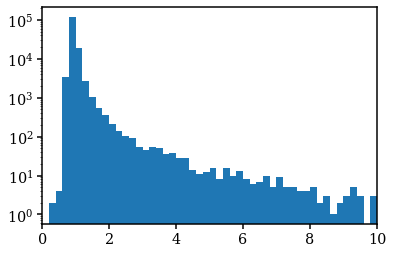

In [8]:
plt.hist(rchi2s, range=(0, 10), bins=50)
plt.xlim(0., 10.)
plt.yscale('log')
print(np.quantile(rchi2s, (0.95, 0.99, 0.995, 0.999)))

In [9]:
len(flagged_hpix)

3333

In [11]:
#np.savetxt('/global/cfs/cdirs/desi/users/chahah/provabgs/svda/sv3-bright-BGS_BRIGHT.flagged.20220701.dat', np.array([flagged_hpix, flagged_targid]).T)
np.savetxt('/global/cfs/cdirs/desi/users/chahah/provabgs/svda/sv3-bright-BGS_BRIGHT.flagged.20220719.dat', np.array([flagged_hpix, flagged_targid]).T, fmt='%i %i')

In [13]:
_hpix, _tid = np.loadtxt('/global/cfs/cdirs/desi/users/chahah/provabgs/svda/sv3-bright-BGS_BRIGHT.flagged.20220719.dat', dtype=int, unpack=True)

# check BGS Faint

In [18]:
# BGS faint healpixels
hpixs = np.array([int(f.split('-')[-1].split('.')[0]) for f in glob.glob(os.path.join(dir_dat, 'provabgs-sv3-bright-*.BGS_FAINT.hdf5'))])
print('%i healpixels' % len(hpixs))

360 healpixels


11.318783077987627 11.961178014700181 12.437234840031888
11.590417503080083 11.782558426503797 12.482268894817212
11.464118894083086 12.354854223756726 12.496771932908755
11.745311563045922 12.135699820380506 12.446515388423768
11.312008218500132 11.746763752909002 12.416718637219605
11.553984108777625 12.248141955531977 12.494900345074637
11.481200821373692 12.014556263554432 12.4628075773985
11.749191724641925 12.073602122832353 12.455535963266787
11.696640245960849 12.057357329849811 12.467500783518162
11.700238845854345 12.158748758410363 12.48880493628409
11.672653961421627 12.184316458885728 12.48994363675644
10.954166600679457 11.995638145738212 12.47702220765207
11.112848983868508 11.926540569595966 12.437705543858808
11.257042487807977 11.986266565462557 12.482363675135984
11.158788983767492 12.205663786296299 12.44383660730518
11.218754445251754 11.433898196076939 12.418429244330108
11.04277830510576 12.246523196177815 12.472821691192562
11.870610557741358 12.096063125480097 

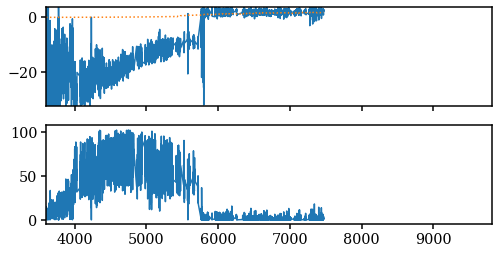

11.447372866558348 12.204077250615612 12.473758690122052
11.715331101785909 12.429561403992192 12.499009896510579
11.489530400684806 11.691076163394573 12.492362019223563
11.539582733227194 11.965221171565787 12.44906681206636
12.00126788736171 12.418845980775803 12.498612757199105
11.421168196375088 11.941822628129476 12.48597042804986
11.557410778704089 11.9967244250993 12.426290884190543
11.506464255137113 12.173810194539952 12.436556448051542
11.40056375320558 11.813124993384607 12.418175971057998
11.217683025268897 11.848766151999722 12.477535045696618
11.359557795977013 12.096194856725486 12.486408890557838
11.503782099914117 12.124089083569736 12.489930794037107
10.961062367028324 11.84328761073724 12.458050079471283
11.969455650371552 12.292291793385864 12.496130298753574
11.454425285377257 11.81738315929808 12.42282294908257
11.485577674207898 12.103033012716296 12.476051291062646
11.32455219411666 11.747315888252643 12.488489118397938
11.580667237692575 11.950104632844898 12.

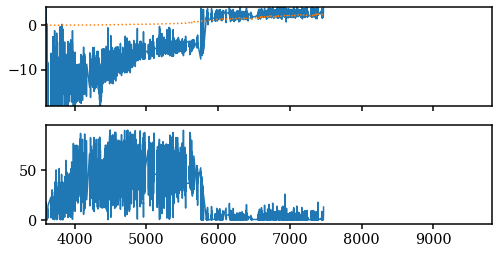

10.89034634507809 11.650328404688207 12.407219510905906
11.5556022748618 11.871264134428385 12.431700563881359
11.478952195904364 11.967421738760034 12.445174663179223
11.329299546226911 12.036715388973828 12.473319139888428
12.469347693547812 1.0632231
21.107625141681527 1.0082003
11.482260034408466 12.188808604128155 12.48705946365124
11.937985351374001 12.27204890175172 12.494651718009996
10.849901284283616 12.397683169017577 12.498431854352086
11.094785531841346 11.917674150642036 12.46386035335775
11.087456667754662 12.135160587379172 12.407782124180496
11.444616654592782 11.982086576132374 12.475540327736606
11.071337474759192 11.860258368119705 12.404396507494342
11.957748281917485 12.111276421241866 12.471408556992964
11.137378502173013 11.617555570701885 12.426987338156465
11.625156805784714 12.47494129070412 12.49972669304945
11.608778014197716 11.985306705042937 12.473767815007113
11.521211988141454 11.864400034491844 12.474292938384856
11.432577946613186 11.999940225817177 

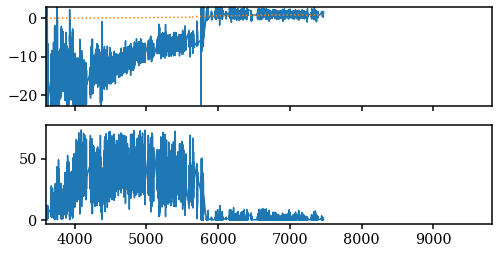

11.682231389274795 12.384605612689832 12.498410651894378
9.288883904982518 2.615447
11.41065555302697 12.039313458706946 12.468067543263501
11.387627984762867 12.48782407388067 12.499842700682915
11.698115836284243 12.105364563193405 12.489551838173648
11.522081974771893 12.148835441604454 12.495437433887432
11.61965442458005 11.965153775299395 12.488775974597631
11.645518304705476 11.971959674873705 12.472770807276836
11.332255942719534 12.2551703354311 12.496083598159144
11.40391640353144 11.938700288526933 12.415885900343971
11.092228500593315 12.283673700544181 12.411705672618972
11.157989640419814 12.166510167871117 12.493932356044086
11.55778773041183 12.25720817828098 12.465931591771216
11.699787382005601 12.075744420726906 12.463853282732126
11.930665026191033 12.452452737226066 12.499271124097248
11.573148823814899 11.90060284679578 12.448550390319275
11.595971295200243 11.904919188238097 12.42859632958869
11.327556973898549 11.912909965280136 12.460786312339684
11.28090864185

In [19]:
flagged_hpix, flagged_targid = [], []
rchi2s = []
for hpix in hpixs:
    try: 
        f = h5py.File(os.path.join(dir_dat, 'provabgs-sv3-bright-%s.BGS_FAINT.hdf5' % hpix), 'r')

        targetids = f['targetid'][...].astype(int)
        redshift  = f['redshift'][...]
        w_obs     = f['wavelength_obs'][...]
        spec_obs  = f['flux_spec_obs'][...]
        spec_mod  = f['flux_spec_model'][...]
        ivar_obs  = f['ivar_spec_obs'][...]
        
        mcmc = f['samples'][:,:,:,0]
    except: 
        print()
        print('%i is problematic' % hpix)
        print()
        continue
        
    for igal in range(spec_obs.shape[0]): 
        flagged = False
        ##################################################################
        # check goodness of fit
        ##################################################################
        # calculate chi2 to flag based on goodness of fit        
        w_lines_z = w_lines * (1 + redshift[igal])
        
        # get mask 
        mask = np.zeros(w_obs.shape[1]).astype(bool)
        # mask 40A around emission lines
        for wl in w_lines_z:
            mask = mask | ((w_obs[igal] > wl - 20) & (w_obs[igal] < wl + 20))
        # mask regions where sky subtraction is not great            
        mask = mask | (w_obs[igal] > 7500) 
        
        # chi2
        chi2 = (spec_mod[igal][~mask] - spec_obs[igal][~mask])**2 * ivar_obs[igal][~mask]
        # sigma clip 
        chi2_lim = np.quantile(chi2, 0.99)
        
        rchi2 = np.mean(chi2[chi2 < chi2_lim])
        rchi2s.append(rchi2)
        
        if rchi2 > 5: 
            flagged = True
            print(rchi2, np.mean(ivar_obs[igal][~mask]))
            
            if (igal % 10) == 0: 
                fig = plt.figure(figsize=(8, 4))
                sub = fig.add_subplot(211)
                sub.plot(w_obs[igal][~mask][chi2 < chi2_lim], spec_obs[igal][~mask][chi2 < chi2_lim])
                sub.plot(w_obs[igal][~mask][chi2 < chi2_lim], spec_mod[igal][~mask][chi2 < chi2_lim], ls=':')
                sub.set_xlim(w_obs[igal].min(), w_obs[igal].max())
                sub.set_ylim(np.nanquantile(spec_obs[igal], (0.01, 0.99)))
                sub.set_xticklabels([])

                sub = fig.add_subplot(212)
                sub.plot(w_obs[igal][~mask][chi2 < chi2_lim], chi2[chi2 < chi2_lim])
                sub.set_xlim(w_obs[igal].min(), w_obs[igal].max())

                plt.show()
        
        ##################################################################
        # check whether M* posterior hits prior limits
        ##################################################################        
        mcmc_i = mcmc[igal].flatten()
        
        m_low, m_med, m_high = np.quantile(mcmc_i, (0.01, 0.5, 0.99))
        
        if (m_low < 7.1) or (m_high > 12.4): 
            flagged = True
            print(m_low, m_med, m_high)
            #fig = plt.figure(figsize=(4, 4))
            #sub = fig.add_subplot(111)
            #sub.hist(mcmc_i, range=(7., 12.5), bins=40)
            #sub.set_xlim(7., 12.5) 
            #plt.show()

        if flagged: 
            flagged_hpix.append(hpix)
            flagged_targid.append(targetids[igal])

In [20]:
print('%i galaxies flagged' % len(flagged_hpix))

3855 galaxies flagged


In [21]:
np.savetxt('/global/cfs/cdirs/desi/users/chahah/provabgs/svda/sv3-bright-BGS_FAINT.flagged.20220719.dat', np.array([flagged_hpix, flagged_targid]).T, fmt='%i %i')